In [96]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [6]:
headers = ['checking', 'duration', 'history', 'purpose', 'amount', 'savings', 'employment', 'installmnent', 'status-sex', 'd-g', 'residence', 'property', 'age', 'installment-plans', 'housing', 'existing-credits', 'job', 'num-liable', 'phone', 'foreign-worker', 'good-bad']

In [7]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', header=None, names=headers, delim_whitespace=True)

In [8]:
df.head()

,checking,duration,history,purpose,amount,savings,employment,installmnent,status-sex,d-g,...,property,age,installment-plans,housing,existing-credits,job,num-liable,phone,foreign-worker,good-bad
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [9]:
df2 = pd.get_dummies(df)

In [10]:
X = df2.drop(['good-bad'], axis=1)

In [11]:
y = df2[['good-bad']]

In [12]:
y.groupby('good-bad')['good-bad'].count()

good-bad
1    700
2    300
Name: good-bad, dtype: int64

In [13]:
y['good-bad'].count()

1000

In [14]:
from sklearn.svm import LinearSVC

In [15]:
clf = LinearSVC(random_state=1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
y_train.shape

(670, 1)

In [18]:
X_train.shape

(670, 61)

In [19]:
clf.fit(X_train, y_train['good-bad'])


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
     verbose=0)

In [20]:
y_pred = clf.predict(X_test)

In [21]:
print(X_train.shape)
print(y_train.shape)

(670, 61)
(670, 1)


In [22]:
y_test['good-bad'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2,

In [23]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.7424242424242424

In [24]:
from sklearn.neighbors import NearestNeighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train['good-bad']) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
y_pred_neigh = neigh.predict(X_test)

In [27]:
y_pred_neigh

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1,

In [28]:
accuracy_score(y_true=y_test, y_pred=y_pred_neigh)

0.7

In [29]:
from sklearn import preprocessing

In [30]:
scaler = preprocessing.StandardScaler()

In [31]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(n_estimators=100, max_depth=20,
                              random_state=0, n_jobs=-1)
clf.fit(X_train, y_train['good-bad'])
accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))

0.7727272727272727

In [34]:
# Next time look at confusion matrix
# ROC curve 

In [35]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
clf = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test) 

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7606060606060606

In [37]:
accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))

0.7606060606060606

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
clf = AdaBoostClassifier(random_state=0).fit(X_train, y_train)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
clf.score(X_test, y_test)

0.7515151515151515

In [53]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train) 

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
clf.score(X_test, y_test)

0.7575757575757576

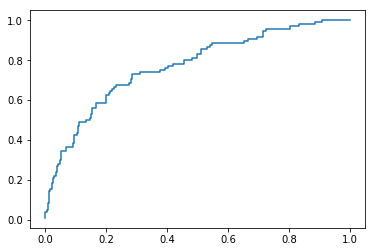

In [100]:
from sklearn.metrics import roc_curve, auc
probs = clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test['good-bad'].values, probs, pos_label=2)
plt.plot(fpr, tpr)

In [59]:
probs.shape[0]

330

In [65]:
y_test.shape

(330, 1)

In [66]:
probs.shape

()